## Introduction
**This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati in the summers.**

**The dataset is provided by DeltaX is the pioneering cross-channel digital advertising platform. The cloud-based platform leverages big data, user behavior, and machine learning algorithms to improve performance across the business funnel of advertisers.**

## Data Description

date: the date on which the ad was made live

campaign: campaign number

adgroup: adgroup number

ad: ad number

impressions - Number of time the ad was shown

clicks - Number of time the ad clicked shown

cost - Amount spent to show ad

conversions - Number of transactions received

revenue: revenue generated from the ad

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,10


## Reading and exploring dataset

In [2]:
train_df=pd.read_csv('Train_Data.csv')
test_df=pd.read_csv('Test_Data.csv')

In [3]:
train_df.head()

date    campaign    adgroup    ad  impressions  clicks  cost  \
0  01-08-2020  campaign 1  adgroup 1  ad 1           24       6  0.08   
1  01-08-2020  campaign 1  adgroup 2  ad 1            1       0  0.00   
2  01-08-2020  campaign 1  adgroup 3  ad 1           13       4  0.04   
3  01-08-2020  campaign 1  adgroup 4  ad 1            5       4  0.08   
4  01-08-2020  campaign 1  adgroup 1  ad 2          247     126  1.29   

   conversions  revenue  
0            0     0.00  
1            0     0.00  
2            0     0.00  
3            0     0.00  
4            4   925.71

In [4]:
test_df.head()

date    campaign    adgroup    ad  cost  impressions  clicks  \
0  01-03-2021  campaign 1  adgroup 1  ad 1  0.58          121      49   
1  01-03-2021  campaign 1  adgroup 3  ad 1  0.17           22      12   
2  01-03-2021  campaign 1  adgroup 4  ad 1  0.05            5       3   
3  01-03-2021  campaign 1  adgroup 2  ad 1  0.01            2       1   
4  01-03-2021  campaign 1  adgroup 2  ad 2  0.01            3       1   

   conversions  
0            1  
1            0  
2            0  
3            0  
4            0

In [5]:
train_df.shape,test_df.shape

((4571, 9), (318, 8))

In [6]:
# Adding test and traing flag so that we can split train/test data
train_df['tst']=0
test_df['tst']=1

In [7]:
# concatenating train and test data for data preprocessing
data=pd.concat([train_df,test_df],axis=0,copy=True)
data.head()
df = data.copy()

In [8]:
df.describe().T

count        mean          std  min   25%    50%    75%  \
impressions  4889.0   90.977705   193.610988  1.0  5.00  16.00  85.00   
clicks       4889.0   42.454899    97.591346  0.0  2.00   7.00  38.00   
cost         4889.0    2.643461    13.900229  0.0  0.04   0.19   1.26   
conversions  4889.0    1.304357     5.073662  0.0  0.00   0.00   1.00   
revenue      4571.0  231.865340  1091.742763  0.0  0.00   0.00  92.60   
tst          4889.0    0.065044     0.246629  0.0  0.00   0.00   0.00   

                  max  
impressions   3239.00  
clicks        1771.00  
cost           531.25  
conversions     94.00  
revenue      20515.41  
tst              1.00

In [9]:
df.isna().sum()

date             0
campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue        318
tst              0
dtype: int64

In [10]:
df[(df.conversions==0) & (df.tst==0)].shape
df

date    campaign    adgroup     ad  impressions  clicks  cost  \
0    01-08-2020  campaign 1  adgroup 1   ad 1           24       6  0.08   
1    01-08-2020  campaign 1  adgroup 2   ad 1            1       0  0.00   
2    01-08-2020  campaign 1  adgroup 3   ad 1           13       4  0.04   
3    01-08-2020  campaign 1  adgroup 4   ad 1            5       4  0.08   
4    01-08-2020  campaign 1  adgroup 1   ad 2          247     126  1.29   
..          ...         ...        ...    ...          ...     ...   ...   
313  15-03-2021  campaign 1  adgroup 4  ad 55            1       1  0.01   
314  15-03-2021  campaign 1  adgroup 3  ad 55            5       1  0.01   
315  15-03-2021  campaign 1  adgroup 1  ad 55           25      11  0.14   
316  15-03-2021  campaign 1  adgroup 3  ad 56            9       4  0.06   
317  15-03-2021  campaign 1  adgroup 1  ad 56           67      27  0.33   

     conversions  revenue  tst  
0              0     0.00    0  
1              0     0.00    0  
2              0     0.00    0  
3              0     0.00    0  
4              4   925.71    0  
..           ...      ...  ...  
313            0      NaN    1  
314            0      NaN    1  
315            0      NaN    1  
316            0      NaN    1  
317            1      NaN    1  

[4889 rows x 10 columns]

## Feature Engineering

In [11]:
data['day']=data['date'].apply(lambda x:x[0:2]).astype(int)

data['month']=data['date'].apply(lambda x:x[3:5]).astype(int)

data['year']=pd.DatetimeIndex(data['date']).year
data

date    campaign    adgroup     ad  impressions  clicks  cost  \
0    01-08-2020  campaign 1  adgroup 1   ad 1           24       6  0.08   
1    01-08-2020  campaign 1  adgroup 2   ad 1            1       0  0.00   
2    01-08-2020  campaign 1  adgroup 3   ad 1           13       4  0.04   
3    01-08-2020  campaign 1  adgroup 4   ad 1            5       4  0.08   
4    01-08-2020  campaign 1  adgroup 1   ad 2          247     126  1.29   
..          ...         ...        ...    ...          ...     ...   ...   
313  15-03-2021  campaign 1  adgroup 4  ad 55            1       1  0.01   
314  15-03-2021  campaign 1  adgroup 3  ad 55            5       1  0.01   
315  15-03-2021  campaign 1  adgroup 1  ad 55           25      11  0.14   
316  15-03-2021  campaign 1  adgroup 3  ad 56            9       4  0.06   
317  15-03-2021  campaign 1  adgroup 1  ad 56           67      27  0.33   

     conversions  revenue  tst  day  month  year  
0              0     0.00    0    1      8  2020  
1              0     0.00    0    1      8  2020  
2              0     0.00    0    1      8  2020  
3              0     0.00    0    1      8  2020  
4              4   925.71    0    1      8  2020  
..           ...      ...  ...  ...    ...   ...  
313            0      NaN    1   15      3  2021  
314            0      NaN    1   15      3  2021  
315            0      NaN    1   15      3  2021  
316            0      NaN    1   15      3  2021  
317            1      NaN    1   15      3  2021  

[4889 rows x 13 columns]

In [12]:
data.shape
df=data.copy()
df

date    campaign    adgroup     ad  impressions  clicks  cost  \
0    01-08-2020  campaign 1  adgroup 1   ad 1           24       6  0.08   
1    01-08-2020  campaign 1  adgroup 2   ad 1            1       0  0.00   
2    01-08-2020  campaign 1  adgroup 3   ad 1           13       4  0.04   
3    01-08-2020  campaign 1  adgroup 4   ad 1            5       4  0.08   
4    01-08-2020  campaign 1  adgroup 1   ad 2          247     126  1.29   
..          ...         ...        ...    ...          ...     ...   ...   
313  15-03-2021  campaign 1  adgroup 4  ad 55            1       1  0.01   
314  15-03-2021  campaign 1  adgroup 3  ad 55            5       1  0.01   
315  15-03-2021  campaign 1  adgroup 1  ad 55           25      11  0.14   
316  15-03-2021  campaign 1  adgroup 3  ad 56            9       4  0.06   
317  15-03-2021  campaign 1  adgroup 1  ad 56           67      27  0.33   

     conversions  revenue  tst  day  month  year  
0              0     0.00    0    1      8  2020  
1              0     0.00    0    1      8  2020  
2              0     0.00    0    1      8  2020  
3              0     0.00    0    1      8  2020  
4              4   925.71    0    1      8  2020  
..           ...      ...  ...  ...    ...   ...  
313            0      NaN    1   15      3  2021  
314            0      NaN    1   15      3  2021  
315            0      NaN    1   15      3  2021  
316            0      NaN    1   15      3  2021  
317            1      NaN    1   15      3  2021  

[4889 rows x 13 columns]

In [13]:
#df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')
#df.index = df['date']

In [14]:
df['CPC']=df.cost.divide(df.clicks).replace(np.inf,0).replace(np.nan,0)
df['CTR']=df.clicks.divide(df.impressions).replace(np.inf,0).replace(np.nan,0)
df['COA']=df.cost.divide(df.conversions).replace(np.inf,0).replace(np.nan,0)


In [15]:
# don't run this
# df.drop(columns=['date'],axis=1,inplace=True)
# df['ROI']=df[df.tst==0].revenue.divide(df[df.tst==0].cost).replace(np.inf,0).replace(np.nan,0)

In [16]:
df['ad']=df['ad'].str.slice(3).astype(int)

df['adgroup']=df['adgroup'].str.slice(8).astype(int)

df['campaign']=df['campaign'].str.slice(-1).astype(int)

df.reset_index()

index        date  campaign  adgroup  ad  impressions  clicks  cost  \
0         0  01-08-2020         1        1   1           24       6  0.08   
1         1  01-08-2020         1        2   1            1       0  0.00   
2         2  01-08-2020         1        3   1           13       4  0.04   
3         3  01-08-2020         1        4   1            5       4  0.08   
4         4  01-08-2020         1        1   2          247     126  1.29   
...     ...         ...       ...      ...  ..          ...     ...   ...   
4884    313  15-03-2021         1        4  55            1       1  0.01   
4885    314  15-03-2021         1        3  55            5       1  0.01   
4886    315  15-03-2021         1        1  55           25      11  0.14   
4887    316  15-03-2021         1        3  56            9       4  0.06   
4888    317  15-03-2021         1        1  56           67      27  0.33   

      conversions  revenue  tst  day  month  year       CPC       CTR     COA  
0               0     0.00    0    1      8  2020  0.013333  0.250000  0.0000  
1               0     0.00    0    1      8  2020  0.000000  0.000000  0.0000  
2               0     0.00    0    1      8  2020  0.010000  0.307692  0.0000  
3               0     0.00    0    1      8  2020  0.020000  0.800000  0.0000  
4               4   925.71    0    1      8  2020  0.010238  0.510121  0.3225  
...           ...      ...  ...  ...    ...   ...       ...       ...     ...  
4884            0      NaN    1   15      3  2021  0.010000  1.000000  0.0000  
4885            0      NaN    1   15      3  2021  0.010000  0.200000  0.0000  
4886            0      NaN    1   15      3  2021  0.012727  0.440000  0.0000  
4887            0      NaN    1   15      3  2021  0.015000  0.444444  0.0000  
4888            1      NaN    1   15      3  2021  0.012222  0.402985  0.3300  

[4889 rows x 17 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 0 to 317
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4889 non-null   object 
 1   campaign     4889 non-null   int32  
 2   adgroup      4889 non-null   int32  
 3   ad           4889 non-null   int32  
 4   impressions  4889 non-null   int64  
 5   clicks       4889 non-null   int64  
 6   cost         4889 non-null   float64
 7   conversions  4889 non-null   int64  
 8   revenue      4571 non-null   float64
 9   tst          4889 non-null   int64  
 10  day          4889 non-null   int32  
 11  month        4889 non-null   int32  
 12  year         4889 non-null   int64  
 13  CPC          4889 non-null   float64
 14  CTR          4889 non-null   float64
 15  COA          4889 non-null   float64
dtypes: float64(5), int32(5), int64(5), object(1)
memory usage: 553.8+ KB


In [18]:
df.month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3])

## Exploratory Data Analysis

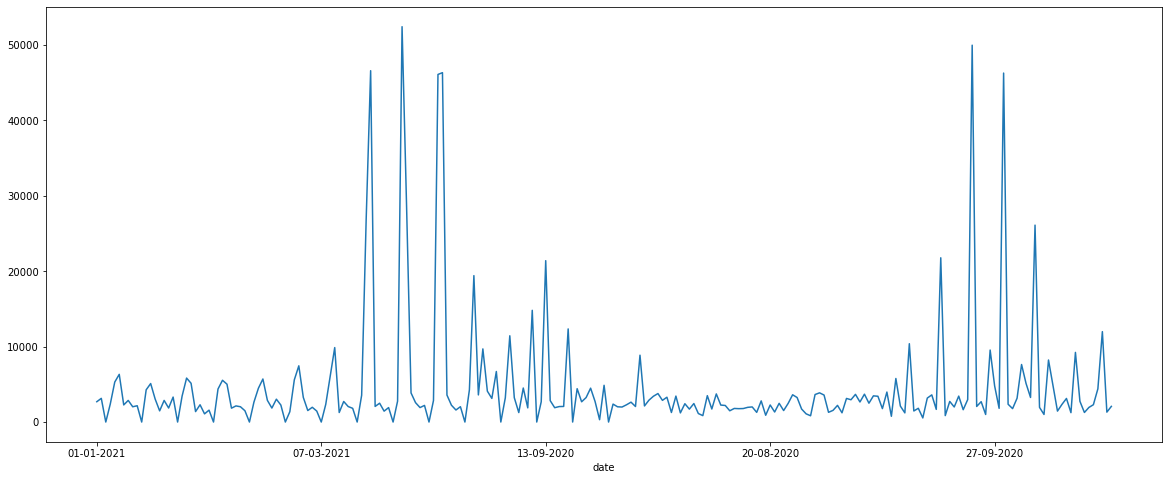

In [19]:
#Time series view
plt.figure(figsize=(20,8))
df.groupby(['date'])['revenue'].sum().plot(kind='line')
plt.show()

C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


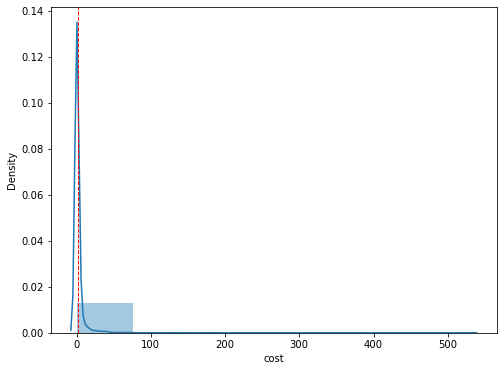

In [20]:
plt.figure(figsize=(8,6))
#plt.hist(df.cost,bins=7,density=True)
sns.distplot(df.cost,bins=7)
plt.axvline(df.cost.mean(), color='r', linestyle='dashed', linewidth=1)

C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


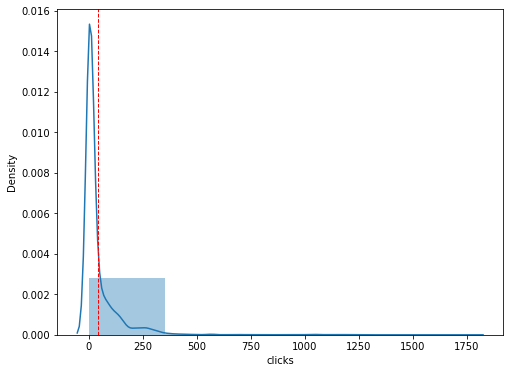

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(df.clicks,bins=5)
plt.axvline(df.clicks.mean(), color='r', linestyle='dashed', linewidth=1)

C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


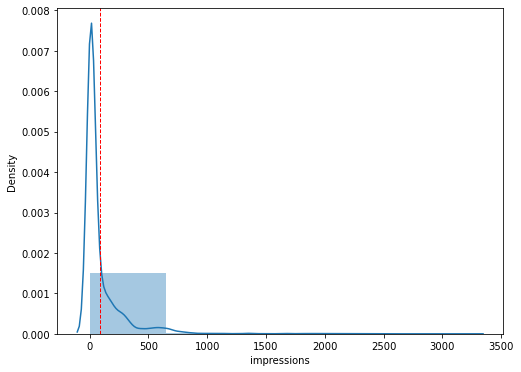

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(df.impressions,bins=5)
plt.axvline(df.impressions.mean(), color='r', linestyle='dashed', linewidth=1)

C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


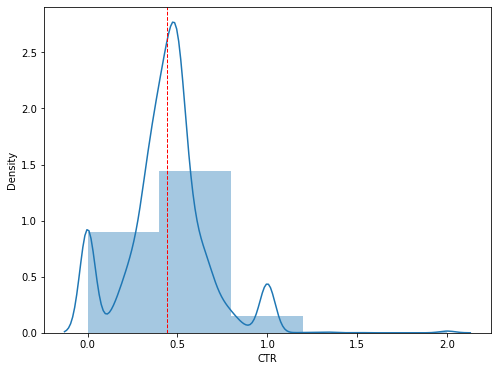

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(df.CTR,bins=5)
plt.axvline(df.CTR.mean(), color='r', linestyle='dashed', linewidth=1)

C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='revenue'>

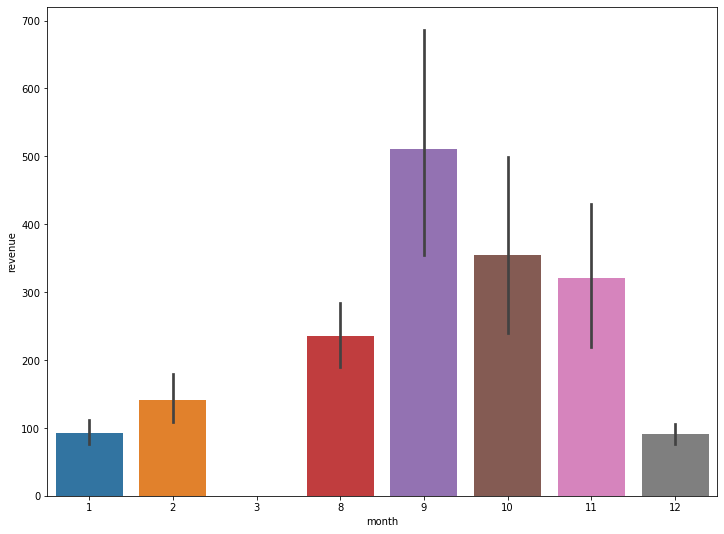

In [24]:

f, ax = plt.subplots(figsize=(12, 9));
sns.barplot('month','revenue',data=df)

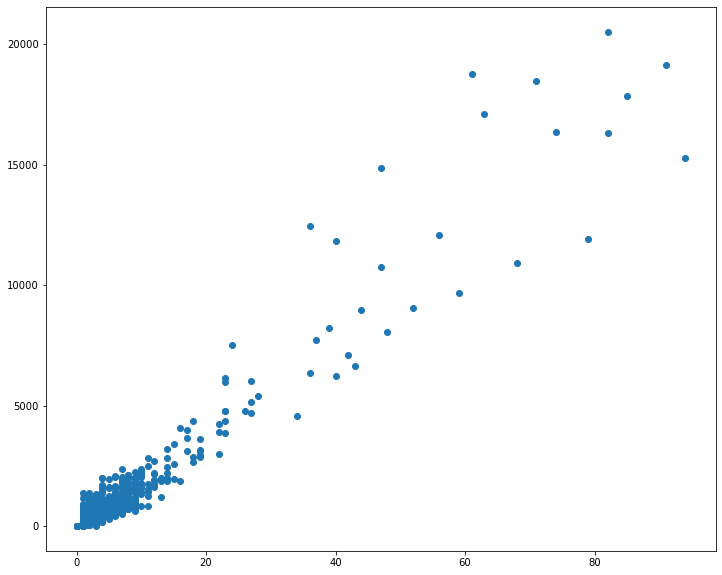

In [25]:
plt.scatter(df.conversions,df.revenue)
plt.show()

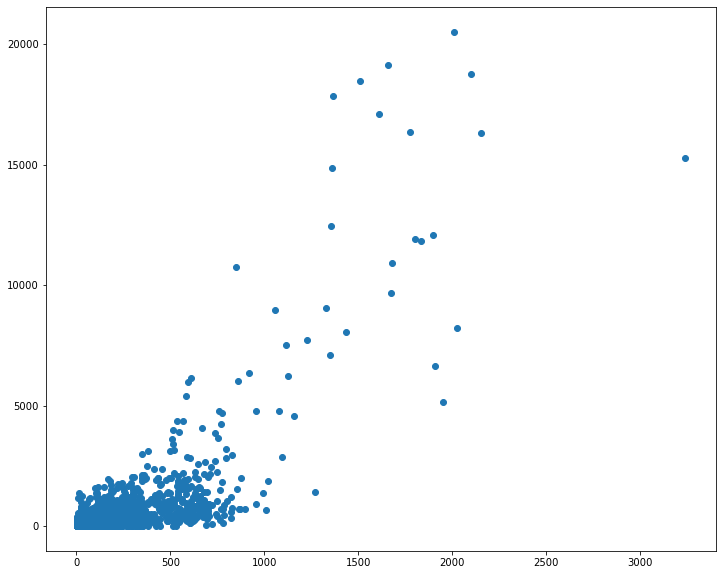

In [26]:
plt.scatter(df.impressions,df.revenue)
plt.show()

C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

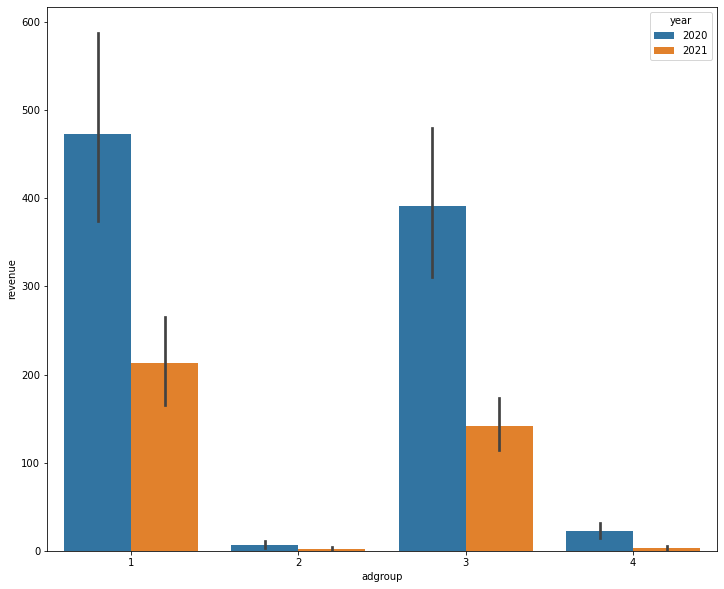

In [27]:
sns.barplot('adgroup','revenue',data=df,hue='year')

In [28]:
df.groupby(['date','adgroup'])['revenue'].sum().sort_values(ascending=False)

date        adgroup
10-10-2020  3          31765.46
26-11-2020  1          29398.31
09-09-2020  3          26956.77
27-11-2020  1          25685.71
09-09-2020  1          24911.10
                         ...   
16-01-2021  2              0.00
            4              0.00
16-02-2021  2              0.00
16-08-2020  2              0.00
15-02-2021  2              0.00
Name: revenue, Length: 908, dtype: float64

In [29]:
list(df.select_dtypes(exclude = ['object','datetime']).drop(columns=['revenue','tst']).columns)

['campaign',
 'adgroup',
 'ad',
 'impressions',
 'clicks',
 'cost',
 'conversions',
 'day',
 'month',
 'year',
 'CPC',
 'CTR',
 'COA']

In [30]:
df_copy=df.copy()


## Feature Trnsformation and Scaling

In [31]:
str_col=['ad','adgroup','campaign','year','month','day','date']
le=LabelEncoder()
for col in str_col:
    df[col]=le.fit_transform(df[col].values)

In [32]:
df.head()

date  campaign  adgroup  ad  impressions  clicks  cost  conversions  \
0     3         0        0   0           24       6  0.08            0   
1     3         0        1   0            1       0  0.00            0   
2     3         0        2   0           13       4  0.04            0   
3     3         0        3   0            5       4  0.08            0   
4     3         0        0   1          247     126  1.29            4   

   revenue  tst  day  month  year       CPC       CTR     COA  
0     0.00    0    0      3     0  0.013333  0.250000  0.0000  
1     0.00    0    0      3     0  0.000000  0.000000  0.0000  
2     0.00    0    0      3     0  0.010000  0.307692  0.0000  
3     0.00    0    0      3     0  0.020000  0.800000  0.0000  
4   925.71    0    0      3     0  0.010238  0.510121  0.3225

In [33]:
sc=MinMaxScaler()
num_col=list(df.select_dtypes(exclude = ['object']).drop(columns=['revenue','tst']).columns)
df_scaled=sc.fit_transform(df[num_col].values)

In [34]:
df_scaled=pd.DataFrame(df_scaled,columns=num_col)
df_scaled.head()

date  campaign   adgroup        ad  impressions    clicks      cost  \
0  0.013274       0.0  0.000000  0.000000     0.007103  0.003388  0.000151   
1  0.013274       0.0  0.333333  0.000000     0.000000  0.000000  0.000000   
2  0.013274       0.0  0.666667  0.000000     0.003706  0.002259  0.000075   
3  0.013274       0.0  1.000000  0.000000     0.001235  0.002259  0.000151   
4  0.013274       0.0  0.000000  0.013514     0.075973  0.071146  0.002428   

   conversions  day     month  year       CPC       CTR       COA  
0     0.000000  0.0  0.428571   0.0  0.003500  0.125000  0.000000  
1     0.000000  0.0  0.428571   0.0  0.000000  0.000000  0.000000  
2     0.000000  0.0  0.428571   0.0  0.002625  0.153846  0.000000  
3     0.000000  0.0  0.428571   0.0  0.005249  0.400000  0.000000  
4     0.042553  0.0  0.428571   0.0  0.002687  0.255061  0.005614

In [35]:
df[num_col]

date  campaign  adgroup  ad  impressions  clicks  cost  conversions  day  \
0       3         0        0   0           24       6  0.08            0    0   
1       3         0        1   0            1       0  0.00            0    0   
2       3         0        2   0           13       4  0.04            0    0   
3       3         0        3   0            5       4  0.08            0    0   
4       3         0        0   1          247     126  1.29            4    0   
..    ...       ...      ...  ..          ...     ...   ...          ...  ...   
313   114         0        3  54            1       1  0.01            0   14   
314   114         0        2  54            5       1  0.01            0   14   
315   114         0        0  54           25      11  0.14            0   14   
316   114         0        2  55            9       4  0.06            0   14   
317   114         0        0  55           67      27  0.33            1   14   

     month  year       CPC       CTR     COA  
0        3     0  0.013333  0.250000  0.0000  
1        3     0  0.000000  0.000000  0.0000  
2        3     0  0.010000  0.307692  0.0000  
3        3     0  0.020000  0.800000  0.0000  
4        3     0  0.010238  0.510121  0.3225  
..     ...   ...       ...       ...     ...  
313      2     1  0.010000  1.000000  0.0000  
314      2     1  0.010000  0.200000  0.0000  
315      2     1  0.012727  0.440000  0.0000  
316      2     1  0.015000  0.444444  0.0000  
317      2     1  0.012222  0.402985  0.3300  

[4889 rows x 14 columns]

In [36]:
train=df[df.tst==0]
test=df[df.tst==1]

In [37]:
train=train.drop(columns=['tst','campaign'],axis=1)

In [38]:
test=test.drop(columns=['tst','revenue','campaign'],axis=1)
test

date  adgroup  ad  impressions  clicks  cost  conversions  day  month  \
0       2        0   0          121      49  0.58            1    0      2   
1       2        2   0           22      12  0.17            0    0      2   
2       2        3   0            5       3  0.05            0    0      2   
3       2        1   0            2       1  0.01            0    0      2   
4       2        1   1            3       1  0.01            0    0      2   
..    ...      ...  ..          ...     ...   ...          ...  ...    ...   
313   114        3  54            1       1  0.01            0   14      2   
314   114        2  54            5       1  0.01            0   14      2   
315   114        0  54           25      11  0.14            0   14      2   
316   114        2  55            9       4  0.06            0   14      2   
317   114        0  55           67      27  0.33            1   14      2   

     year       CPC       CTR   COA  
0       1  0.011837  0.404959  0.58  
1       1  0.014167  0.545455  0.00  
2       1  0.016667  0.600000  0.00  
3       1  0.010000  0.500000  0.00  
4       1  0.010000  0.333333  0.00  
..    ...       ...       ...   ...  
313     1  0.010000  1.000000  0.00  
314     1  0.010000  0.200000  0.00  
315     1  0.012727  0.440000  0.00  
316     1  0.015000  0.444444  0.00  
317     1  0.012222  0.402985  0.33  

[318 rows x 13 columns]

In [39]:
X=train.columns.drop('revenue')
y=train.revenue
X

Index(['date', 'adgroup', 'ad', 'impressions', 'clicks', 'cost', 'conversions',
       'day', 'month', 'year', 'CPC', 'CTR', 'COA'],
      dtype='object')

## Feature Selection

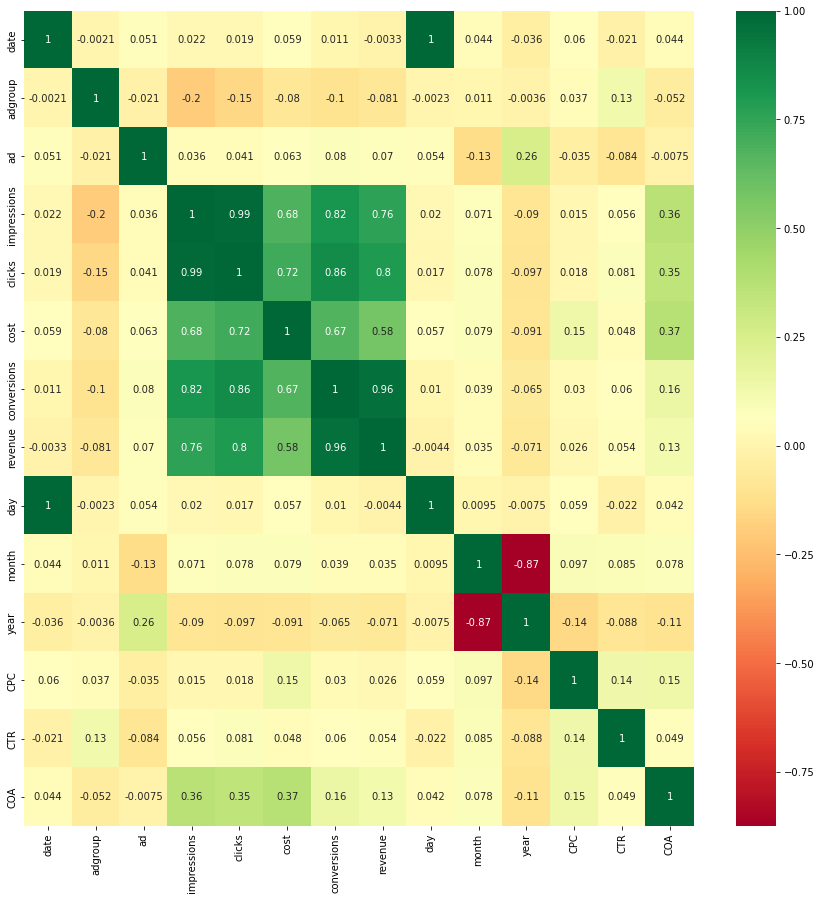

In [40]:
plt.figure(figsize=(15,15))
corrmat =train.corr()
top_corr_features = corrmat.index

#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(train.corr(),annot=True)
plt.show()


In [41]:
train[X].var().sort_values(ascending=False)

impressions    39342.618057
clicks         10033.009839
date            4311.428828
ad               373.424930
cost             206.256076
day               77.234203
conversions       27.289366
month              6.358523
COA                4.044536
adgroup            1.198460
year               0.212179
CTR                0.053852
CPC                0.018230
dtype: float64

In [42]:
#features=['COA','cost','conversions','adgroup','clicks','CPC']---v5.0
#features=['conversions','adgroup','date','clicks','year']---v11.0
features=['date', 'adgroup', 'ad', 'impressions', 'clicks', 'cost', 'conversions',
       'day', 'month', 'year', 'CPC', 'CTR', 'COA']  # replaced impression->cost
X=train[features]
y=train.revenue

## Train Test Split

In [43]:
# Since the given data is time series,we will not split on random basis...splitting data contigously
row=3320
X_train=X[:row]
X_val=X[row:]
y_train=y[:row]
y_val=y[row:]

In [44]:
X_test=test[features]

In [45]:
X_train.shape,y_val.shape

((3320, 13), (1251,))

## Model Building and Evaluation

In [46]:
def score(model,test,name='default'):
    model.fit(X_train,y_train)
    ypred=model.predict(test)
    print(name)
    print('Accuracy of training set: ',round(model.score(X_train,y_train)*100,2))
    print('Accuracy of test set: ',round(model.score(test,y_val)*100,2))
    print('mean squared error: ',round(mean_squared_error(y_val,ypred)/100,2))
    print('mean absolute error: ',round(mean_absolute_error(y_val,ypred),2))
    print('r2_score: ',round(r2_score(y_val,ypred)*100,2))

## 1. Linear Regresion

In [47]:
le=LinearRegression()
score(le,X_val,name='Linear Regression')

Linear Regression
Accuracy of training set:  94.64
Accuracy of test set:  73.89
mean squared error:  371.98
mean absolute error:  113.54
r2_score:  73.89


In [48]:
le.fit(X_train,y_train)
ypred=le.predict(test[features])
preds=le.predict(X_val)

In [49]:
ypred_df=pd.DataFrame(ypred,columns=['revenue'])

In [50]:
ypred_df

revenue
0    106.940529
1    -84.390654
2    -78.341146
3    -83.912851
4    -77.342295
..          ...
313  -84.852503
314  -59.229409
315  -83.488769
316  -68.456949
317  134.296938

[318 rows x 1 columns]

In [51]:
train[features][:row].shape

(3320, 13)

## 2. XGBoost Algorithm

In [52]:
# Best hyperparameters

xgb=XGBRegressor(n_estimators=37,learning_rate=0.05,booster='gbtree')
xgb.fit(X_train,y_train)

score(xgb,X_val,name='XG Boost')

XG Boost
Accuracy of training set:  95.01
Accuracy of test set:  91.0
mean squared error:  128.17
mean absolute error:  39.9
r2_score:  91.0


In [53]:
ypred=xgb.predict(X_test)
preds=xgb.predict(X_val)

In [54]:
ypred_df=pd.DataFrame(ypred,columns=['revenue'])

In [55]:
ypred_df.index=test.index
ypred_df.head(10)

revenue
0  147.545273
1    0.075009
2    0.075009
3    0.075009
4    0.075009
5    0.075009
6  181.880661
7    0.075009
8  147.545273
9    0.075009

<ipython-input-56-2d4fb3a814ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-56-2d4fb3a814ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


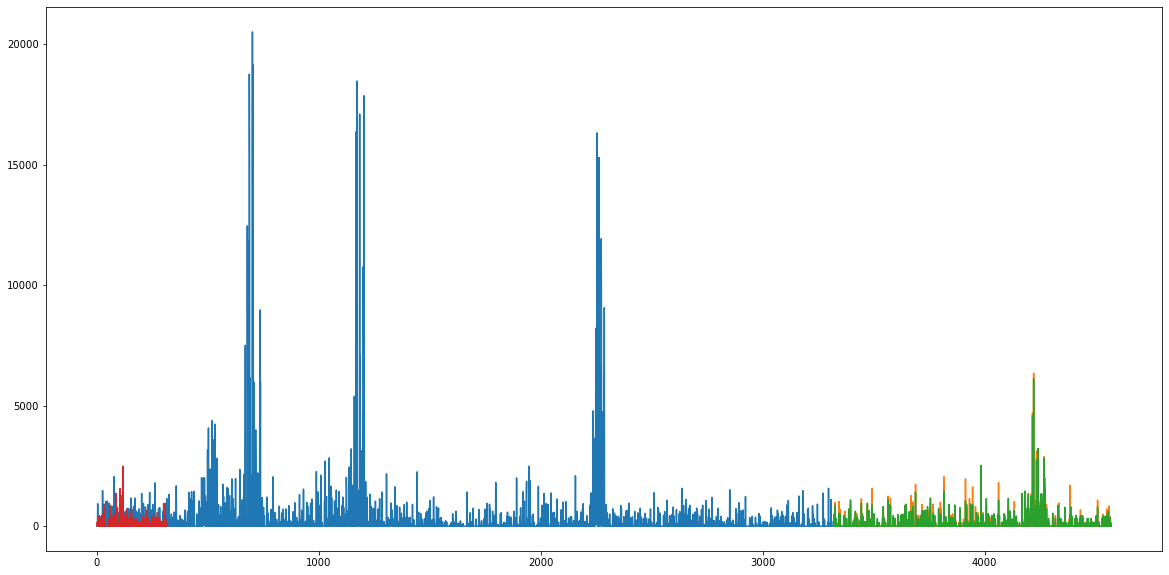

In [56]:
plt.figure(figsize=(20,10))
valid=train[row:]
valid['Predictions'] = 0
valid['Predictions'] = preds
train1=train[features][:row]
valid.index = train[features][row:].index
train1.index = train1[:row].index

plt.plot(train['revenue'][:row]) # train set
plt.plot(valid[['revenue', 'Predictions']]) # val set
plt.plot(ypred_df.revenue) # test set
plt.show()

In [57]:
#use this to find optimum value of n
mse=[]
mae=[]
for i in range(10,60):
    xgb=XGBRegressor(n_estimators=i,learning_rate=0.05)
    xgb.fit(X_train,y_train)
    pr=xgb.predict(X_val)
    ms=mean_squared_error(y_val,pr)
    ma=mean_absolute_error(y_val,pr)
    mse.append(ms)
    mae.append(ma)

In [58]:
10+mae.index(min(mae))

30

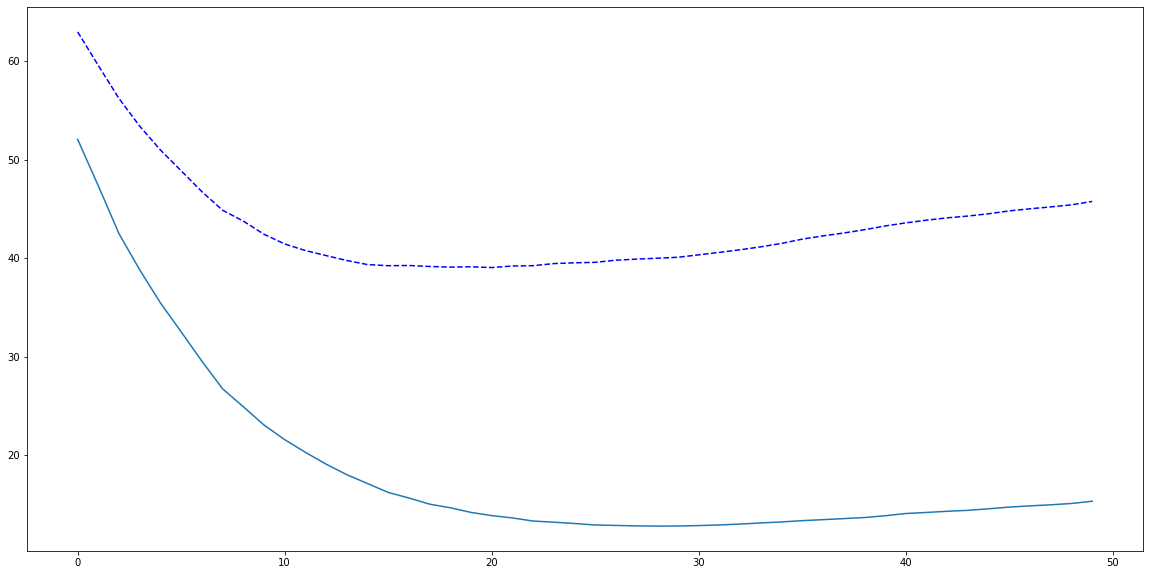

In [59]:
plt.figure(figsize=(20,10))
plt.plot(np.array(mae),'b--')
plt.plot(np.array(mse)/1000)
plt.show()

In [60]:
 xgb_model = XGBRegressor(
         objective = 'reg:squarederror',
         colsample_bytree = 0.7,
         learning_rate = 0.1,
         max_depth = 3,
         min_child_weight = 3,
         n_estimators = 60,
         subsample = 0.7)

 %time xgb_model.fit(X_train, y_train, early_stopping_rounds=7, eval_set=[(X_val, y_val)], verbose=False)

 y_pred_xgb = xgb_model.predict(X_val)
y_pred_xgb1 = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

 print("MAE: ", mae_xgb)
score(xgb_model,X_val,name='XG Boost')

Wall time: 40.3 ms
MAE:  43.592382902027985
XG Boost
Accuracy of training set:  95.48
Accuracy of test set:  91.31
mean squared error:  123.83
mean absolute error:  43.59
r2_score:  91.31


#  HyperTuning

In [61]:
 def hyperParameterTuning(X_train, y_train):
        param_tuning = {
         'learning_rate': [0.01, 0.1,0.05],
        'max_depth': [3, 5, 7, 10],
         'min_child_weight': [1, 3, 5],
         'subsample': [0.5, 0.7],
         'colsample_bytree': [0.5, 0.7],
         'n_estimators' : [40, 50, 60],
         'objective': ['reg:squarederror']
     }

        xgb_model = XGBRegressor()

        gsearch = GridSearchCV(estimator = xgb_model,
                            param_grid = param_tuning,                        
                            #scoring = 'neg_mean_absolute_error', #MAE
                            #scoring = 'neg_mean_squared_error',  #MSE
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)

        gsearch.fit(X_train,y_train)
        ypred=gsearch.predict(X_val)
        ypred_1=gsearch.predict(X_test)
        
        print('Accuracy of training set: ',round(gsearch.score(X_train,y_train)*100,2))
        print('Accuracy of test set: ',round(gsearch.score(X_val,y_val)*100,2))
        print('mean squared error: ',round(mean_squared_error(y_val,ypred)/100,2))
        print('mean absolute error: ',round(mean_absolute_error(y_val,ypred),2))
        print('r2_score: ',round(r2_score(y_val,ypred)*100,2))
        return ypred_1
        

In [62]:
 ypred_1 = hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min


Accuracy of training set:  94.98
Accuracy of test set:  90.73
mean squared error:  132.09
mean absolute error:  42.26
r2_score:  90.73


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.9min finished


In [63]:
ypred2_df=pd.DataFrame(ypred_1,columns=['revenue'])
ypred2_df.to_csv('Submission11232.csv',index=False)

# Optuna HyperTuning


In [64]:
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
dtrain = xgb.DMatrix(X_train,y_train)
dtest  = xgb.DMatrix(X_val,y_val)

In [65]:
def objective(trial):
   
    param = {
#               
                'max_depth':trial.suggest_int('max_depth', 0,12 ),
                'reg_alpha':trial.suggest_uniform('reg_alpha',0.5,5),
                'reg_lambda':trial.suggest_uniform('reg_lambda',0,5),
                'min_child_weight':trial.suggest_int('min_child_weight',0,4),
                'gamma':trial.suggest_uniform('gamma', 1,8 ),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.15,2),
                'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.1,1),
                'subsample':trial.suggest_uniform('subsample',0.05,1),

                'nthread' : -1
            }
    return(return_rmse(param)) # this will return the rmse score 

In [66]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 600, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = np.float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [67]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 1000,show_progress_bar = True)

[I 2021-10-19 00:19:46,629] A new study created in memory with name: no-name-02f6ab84-d08f-446f-89f1-29e81477b5f0
C:\Users\Gaurang Thakur\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


199.112457
[I 2021-10-19 00:19:46,777] Trial 0 finished with value: 199.112457 and parameters: {'max_depth': 12, 'reg_alpha': 2.7512315409044508, 'reg_lambda': 4.9695345834989775, 'min_child_weight': 0, 'gamma': 7.065969349215874, 'learning_rate': 0.5668772615171194, 'colsample_bytree': 0.5786900236191435, 'subsample': 0.5734547128531042}. Best is trial 0 with value: 199.112457.
175.318161
[I 2021-10-19 00:19:46,832] Trial 1 finished with value: 175.318161 and parameters: {'max_depth': 2, 'reg_alpha': 1.1388885663933355, 'reg_lambda': 2.7720212913222246, 'min_child_weight': 4, 'gamma': 6.601430170791831, 'learning_rate': 1.0562267097509044, 'colsample_bytree': 0.8744177788276151, 'subsample': 0.7869214586642468}. Best is trial 1 with value: 175.318161.
317.803497
[I 2021-10-19 00:19:46,877] Trial 2 finished with value: 317.803497 and parameters: {'max_depth': 10, 'reg_alpha': 0.9258829317522048, 'reg_lambda': 4.369939119911396, 'min_child_weight': 4, 'gamma': 4.743740659014563, 'learni

129.490829
[I 2021-10-19 00:19:48,385] Trial 22 finished with value: 129.490829 and parameters: {'max_depth': 5, 'reg_alpha': 2.289542860878976, 'reg_lambda': 4.319567690369552, 'min_child_weight': 3, 'gamma': 3.4311792717768967, 'learning_rate': 0.21626159566166736, 'colsample_bytree': 0.7993397542602365, 'subsample': 0.6757853865076975}. Best is trial 22 with value: 129.490829.
129.72493
[I 2021-10-19 00:19:48,445] Trial 23 finished with value: 129.72493 and parameters: {'max_depth': 4, 'reg_alpha': 2.3652763496487794, 'reg_lambda': 4.546107300885624, 'min_child_weight': 4, 'gamma': 3.168689644219999, 'learning_rate': 0.2223155765075855, 'colsample_bytree': 0.8214287181849589, 'subsample': 0.7122688934695154}. Best is trial 22 with value: 129.490829.
134.273605
[I 2021-10-19 00:19:48,510] Trial 24 finished with value: 134.273605 and parameters: {'max_depth': 4, 'reg_alpha': 2.5900849762674794, 'reg_lambda': 4.5602917195549, 'min_child_weight': 4, 'gamma': 3.5564848456279403, 'learnin

122.704697
[I 2021-10-19 00:19:49,912] Trial 43 finished with value: 122.704697 and parameters: {'max_depth': 1, 'reg_alpha': 2.8979898236540893, 'reg_lambda': 4.48795854575853, 'min_child_weight': 4, 'gamma': 2.908171346022837, 'learning_rate': 0.2571485420799579, 'colsample_bytree': 0.7367842205298375, 'subsample': 0.9901358114632821}. Best is trial 43 with value: 122.704697.
119.905006
[I 2021-10-19 00:19:49,985] Trial 44 finished with value: 119.905006 and parameters: {'max_depth': 1, 'reg_alpha': 3.8640737145484043, 'reg_lambda': 4.58024699676854, 'min_child_weight': 4, 'gamma': 2.94124892505856, 'learning_rate': 0.2423802704065486, 'colsample_bytree': 0.7387625907215252, 'subsample': 0.9947427212248661}. Best is trial 44 with value: 119.905006.
142.630402
[I 2021-10-19 00:19:50,061] Trial 45 finished with value: 142.630402 and parameters: {'max_depth': 1, 'reg_alpha': 4.069742618913315, 'reg_lambda': 4.61185344875337, 'min_child_weight': 4, 'gamma': 2.799089863031947, 'learning_r

123.934341
[I 2021-10-19 00:19:51,413] Trial 64 finished with value: 123.934341 and parameters: {'max_depth': 2, 'reg_alpha': 2.0386664495080415, 'reg_lambda': 4.1558490174103655, 'min_child_weight': 4, 'gamma': 5.856177531401089, 'learning_rate': 0.1957006022735469, 'colsample_bytree': 0.816667911276614, 'subsample': 0.8620310905303941}. Best is trial 44 with value: 119.905006.
126.908104
[I 2021-10-19 00:19:51,485] Trial 65 finished with value: 126.908104 and parameters: {'max_depth': 3, 'reg_alpha': 2.878152403987464, 'reg_lambda': 2.2794330038393764, 'min_child_weight': 4, 'gamma': 6.33582568486183, 'learning_rate': 0.15074752594248497, 'colsample_bytree': 0.7410845268352634, 'subsample': 0.9044196298890165}. Best is trial 44 with value: 119.905006.
126.64801
[I 2021-10-19 00:19:51,561] Trial 66 finished with value: 126.64801 and parameters: {'max_depth': 1, 'reg_alpha': 2.454811857740015, 'reg_lambda': 4.005885900567993, 'min_child_weight': 3, 'gamma': 5.457653827497742, 'learning

408.599487
[I 2021-10-19 00:19:53,009] Trial 87 finished with value: 408.599487 and parameters: {'max_depth': 0, 'reg_alpha': 3.307103117864931, 'reg_lambda': 4.536556257743581, 'min_child_weight': 4, 'gamma': 1.7579746069186772, 'learning_rate': 0.20590250866480586, 'colsample_bytree': 0.7491654859806366, 'subsample': 0.8086063341756441}. Best is trial 72 with value: 113.951759.
129.011246
[I 2021-10-19 00:19:53,097] Trial 88 finished with value: 129.011246 and parameters: {'max_depth': 1, 'reg_alpha': 3.5578875483809584, 'reg_lambda': 4.333484038026959, 'min_child_weight': 4, 'gamma': 1.4492367277477416, 'learning_rate': 0.19044735128953766, 'colsample_bytree': 0.8369219224006499, 'subsample': 0.7274316369189608}. Best is trial 72 with value: 113.951759.
118.050491
[I 2021-10-19 00:19:53,183] Trial 89 finished with value: 118.050491 and parameters: {'max_depth': 1, 'reg_alpha': 3.4855739252079756, 'reg_lambda': 3.931714579302715, 'min_child_weight': 4, 'gamma': 5.903280927988202, 'le

125.185677
[I 2021-10-19 00:19:54,824] Trial 110 finished with value: 125.185677 and parameters: {'max_depth': 1, 'reg_alpha': 3.82478532419636, 'reg_lambda': 3.1975419487702097, 'min_child_weight': 4, 'gamma': 5.955258483449315, 'learning_rate': 0.1598123675221847, 'colsample_bytree': 0.815544476021633, 'subsample': 0.894847108121226}. Best is trial 105 with value: 113.447487.
146.909485
[I 2021-10-19 00:19:54,947] Trial 111 finished with value: 146.909485 and parameters: {'max_depth': 1, 'reg_alpha': 4.1725200406380365, 'reg_lambda': 3.5578447416857455, 'min_child_weight': 4, 'gamma': 7.00063411890766, 'learning_rate': 1.9082694780522491, 'colsample_bytree': 0.754169230537541, 'subsample': 0.9576219272547375}. Best is trial 105 with value: 113.447487.
124.214249
[I 2021-10-19 00:19:55,032] Trial 112 finished with value: 124.214249 and parameters: {'max_depth': 2, 'reg_alpha': 4.361401765451033, 'reg_lambda': 2.7303493250871216, 'min_child_weight': 4, 'gamma': 6.514580540178708, 'lear

130.185654
[I 2021-10-19 00:19:56,629] Trial 131 finished with value: 130.185654 and parameters: {'max_depth': 1, 'reg_alpha': 4.089170555874452, 'reg_lambda': 1.8116414542711266, 'min_child_weight': 4, 'gamma': 5.4549565107024, 'learning_rate': 0.17767944555020973, 'colsample_bytree': 0.6256106473837666, 'subsample': 0.8678568915334037}. Best is trial 124 with value: 113.175125.
128.641251
[I 2021-10-19 00:19:56,721] Trial 132 finished with value: 128.641251 and parameters: {'max_depth': 1, 'reg_alpha': 4.0221721471847856, 'reg_lambda': 2.5945921325020853, 'min_child_weight': 4, 'gamma': 5.265518244441685, 'learning_rate': 0.16961412469397372, 'colsample_bytree': 0.6660502665738631, 'subsample': 0.851252414803511}. Best is trial 124 with value: 113.175125.
128.875351
[I 2021-10-19 00:19:56,822] Trial 133 finished with value: 128.875351 and parameters: {'max_depth': 1, 'reg_alpha': 3.965694982781299, 'reg_lambda': 1.487814324017306, 'min_child_weight': 4, 'gamma': 5.1012096994038805, '

113.999245
[I 2021-10-19 00:19:58,485] Trial 152 finished with value: 113.999245 and parameters: {'max_depth': 1, 'reg_alpha': 1.3837120084785668, 'reg_lambda': 1.554123156797352, 'min_child_weight': 1, 'gamma': 5.540930015424003, 'learning_rate': 0.15991417520452705, 'colsample_bytree': 0.6935486151806948, 'subsample': 0.8706759351819902}. Best is trial 134 with value: 113.060356.
113.685371
[I 2021-10-19 00:19:58,586] Trial 153 finished with value: 113.685371 and parameters: {'max_depth': 1, 'reg_alpha': 1.6249932837015664, 'reg_lambda': 1.5196587439998137, 'min_child_weight': 1, 'gamma': 5.617882637552395, 'learning_rate': 0.15951870445287955, 'colsample_bytree': 0.6803979135444295, 'subsample': 0.9467543234303447}. Best is trial 134 with value: 113.060356.
120.247704
[I 2021-10-19 00:19:58,695] Trial 154 finished with value: 120.247704 and parameters: {'max_depth': 1, 'reg_alpha': 1.3290784854847768, 'reg_lambda': 1.2852388625915347, 'min_child_weight': 1, 'gamma': 5.50439152695805

130.286118
[I 2021-10-19 00:20:00,558] Trial 174 finished with value: 130.286118 and parameters: {'max_depth': 1, 'reg_alpha': 1.4616864768548274, 'reg_lambda': 2.620390351886694, 'min_child_weight': 1, 'gamma': 5.80962426931938, 'learning_rate': 0.16726519017255034, 'colsample_bytree': 0.7897228947482902, 'subsample': 0.9653888937004799}. Best is trial 134 with value: 113.060356.
407.560669
[I 2021-10-19 00:20:00,617] Trial 175 finished with value: 407.560669 and parameters: {'max_depth': 0, 'reg_alpha': 1.846167003224406, 'reg_lambda': 2.7452512449052375, 'min_child_weight': 1, 'gamma': 6.001200457763754, 'learning_rate': 0.1846739778066101, 'colsample_bytree': 0.7251228164901472, 'subsample': 0.9335077646739723}. Best is trial 134 with value: 113.060356.
191.896851
[I 2021-10-19 00:20:00,698] Trial 176 finished with value: 191.896851 and parameters: {'max_depth': 1, 'reg_alpha': 1.2256195670407974, 'reg_lambda': 2.9448533607397147, 'min_child_weight': 1, 'gamma': 5.56458707194555, '

120.023445
[I 2021-10-19 00:20:02,451] Trial 195 finished with value: 120.023445 and parameters: {'max_depth': 1, 'reg_alpha': 0.820095368648123, 'reg_lambda': 1.8693533616329097, 'min_child_weight': 1, 'gamma': 5.564530214164731, 'learning_rate': 0.16190955769489768, 'colsample_bytree': 0.6916970452627607, 'subsample': 0.8853472414488842}. Best is trial 192 with value: 112.640953.
122.960091
[I 2021-10-19 00:20:02,558] Trial 196 finished with value: 122.960091 and parameters: {'max_depth': 1, 'reg_alpha': 0.716980916318571, 'reg_lambda': 2.2620045413706253, 'min_child_weight': 1, 'gamma': 5.4276653895033276, 'learning_rate': 0.18648088354088743, 'colsample_bytree': 0.6491179588591435, 'subsample': 0.2510916582147267}. Best is trial 192 with value: 112.640953.
113.772675
[I 2021-10-19 00:20:02,641] Trial 197 finished with value: 113.772675 and parameters: {'max_depth': 1, 'reg_alpha': 1.6142816042024464, 'reg_lambda': 1.7383732482159433, 'min_child_weight': 1, 'gamma': 5.92570316127816

115.860947
[I 2021-10-19 00:20:04,554] Trial 216 finished with value: 115.860947 and parameters: {'max_depth': 1, 'reg_alpha': 1.7794156286035785, 'reg_lambda': 1.9590500127081734, 'min_child_weight': 1, 'gamma': 6.040723673892835, 'learning_rate': 0.19370456887340187, 'colsample_bytree': 0.6656518243614226, 'subsample': 0.8656406380495307}. Best is trial 192 with value: 112.640953.
112.181404
[I 2021-10-19 00:20:04,680] Trial 217 finished with value: 112.181404 and parameters: {'max_depth': 1, 'reg_alpha': 1.5377330267179687, 'reg_lambda': 2.2127723332463893, 'min_child_weight': 1, 'gamma': 5.675050096512144, 'learning_rate': 0.171429764907524, 'colsample_bytree': 0.6826882587232782, 'subsample': 0.8759022957399331}. Best is trial 217 with value: 112.181404.
114.821472
[I 2021-10-19 00:20:04,808] Trial 218 finished with value: 114.821472 and parameters: {'max_depth': 1, 'reg_alpha': 1.8396346206263394, 'reg_lambda': 2.2702094337061864, 'min_child_weight': 1, 'gamma': 6.195517197951641

113.778511
[I 2021-10-19 00:20:06,411] Trial 237 finished with value: 113.778511 and parameters: {'max_depth': 1, 'reg_alpha': 1.591946132352356, 'reg_lambda': 2.287206652359179, 'min_child_weight': 1, 'gamma': 5.954034266919793, 'learning_rate': 0.17264061920430995, 'colsample_bytree': 0.7096722637955692, 'subsample': 0.857889842941785}. Best is trial 217 with value: 112.181404.
117.887886
[I 2021-10-19 00:20:06,495] Trial 238 finished with value: 117.887886 and parameters: {'max_depth': 1, 'reg_alpha': 1.8843347320776804, 'reg_lambda': 2.310529010118221, 'min_child_weight': 1, 'gamma': 5.808768323209293, 'learning_rate': 0.162976422192282, 'colsample_bytree': 0.7232412377110219, 'subsample': 0.8437684810669399}. Best is trial 217 with value: 112.181404.
130.494919
[I 2021-10-19 00:20:06,633] Trial 239 finished with value: 130.494919 and parameters: {'max_depth': 7, 'reg_alpha': 1.7066917566503754, 'reg_lambda': 2.0899175483881582, 'min_child_weight': 1, 'gamma': 5.384521266920512, 'l

121.081451
[I 2021-10-19 00:20:08,393] Trial 258 finished with value: 121.081451 and parameters: {'max_depth': 2, 'reg_alpha': 1.624681805132167, 'reg_lambda': 2.2371636015994993, 'min_child_weight': 1, 'gamma': 5.80630141285659, 'learning_rate': 0.1500718655395695, 'colsample_bytree': 0.752268225896949, 'subsample': 0.8584861305077266}. Best is trial 217 with value: 112.181404.
118.628067
[I 2021-10-19 00:20:08,510] Trial 259 finished with value: 118.628067 and parameters: {'max_depth': 1, 'reg_alpha': 1.7127587991322712, 'reg_lambda': 2.4596844569631005, 'min_child_weight': 1, 'gamma': 4.1299639754590265, 'learning_rate': 0.16243743050803167, 'colsample_bytree': 0.6728923317873667, 'subsample': 0.8831507982661584}. Best is trial 217 with value: 112.181404.
142.850098
[I 2021-10-19 00:20:08,773] Trial 260 finished with value: 142.850098 and parameters: {'max_depth': 12, 'reg_alpha': 1.5527536293411752, 'reg_lambda': 2.3320183915907142, 'min_child_weight': 1, 'gamma': 5.928593053766553

122.455864
[I 2021-10-19 00:20:10,522] Trial 279 finished with value: 122.455864 and parameters: {'max_depth': 2, 'reg_alpha': 1.8274627117327817, 'reg_lambda': 1.723724866727243, 'min_child_weight': 1, 'gamma': 5.657744143748273, 'learning_rate': 0.15716182498617481, 'colsample_bytree': 0.7352173284446583, 'subsample': 0.8370258145610834}. Best is trial 217 with value: 112.181404.
121.935356
[I 2021-10-19 00:20:10,623] Trial 280 finished with value: 121.935356 and parameters: {'max_depth': 1, 'reg_alpha': 1.9629425604697375, 'reg_lambda': 2.1944114205197263, 'min_child_weight': 1, 'gamma': 6.096129515117051, 'learning_rate': 0.1500869982945375, 'colsample_bytree': 0.6795612603823684, 'subsample': 0.9362199503940865}. Best is trial 217 with value: 112.181404.
124.132698
[I 2021-10-19 00:20:10,703] Trial 281 finished with value: 124.132698 and parameters: {'max_depth': 1, 'reg_alpha': 1.7466534768037367, 'reg_lambda': 1.9089625354867212, 'min_child_weight': 1, 'gamma': 5.889827289482795

139.69635
[I 2021-10-19 00:20:12,491] Trial 300 finished with value: 139.69635 and parameters: {'max_depth': 1, 'reg_alpha': 1.8304244078771577, 'reg_lambda': 1.8164349687419712, 'min_child_weight': 1, 'gamma': 5.895182646581824, 'learning_rate': 0.20828901605654446, 'colsample_bytree': 0.7477152115994458, 'subsample': 0.8766362720500703}. Best is trial 217 with value: 112.181404.
116.225464
[I 2021-10-19 00:20:12,580] Trial 301 finished with value: 116.225464 and parameters: {'max_depth': 1, 'reg_alpha': 1.5099339084795644, 'reg_lambda': 1.9538547162529254, 'min_child_weight': 1, 'gamma': 6.42467098699951, 'learning_rate': 0.15064215268602493, 'colsample_bytree': 0.6926001117432697, 'subsample': 0.9186721330697993}. Best is trial 217 with value: 112.181404.
120.932289
[I 2021-10-19 00:20:12,658] Trial 302 finished with value: 120.932289 and parameters: {'max_depth': 1, 'reg_alpha': 1.674706318601736, 'reg_lambda': 2.2137400277266894, 'min_child_weight': 1, 'gamma': 5.654001608131909, 

127.98629
[I 2021-10-19 00:20:14,526] Trial 321 finished with value: 127.98629 and parameters: {'max_depth': 1, 'reg_alpha': 1.8950693074221068, 'reg_lambda': 2.1965895690187445, 'min_child_weight': 1, 'gamma': 5.729704184958915, 'learning_rate': 0.1752302658035515, 'colsample_bytree': 0.6823114796923968, 'subsample': 0.8483188115617963}. Best is trial 217 with value: 112.181404.
113.455956
[I 2021-10-19 00:20:14,621] Trial 322 finished with value: 113.455956 and parameters: {'max_depth': 1, 'reg_alpha': 1.7518799010805797, 'reg_lambda': 2.0510603296205536, 'min_child_weight': 1, 'gamma': 6.239708718901988, 'learning_rate': 0.1646409002937049, 'colsample_bytree': 0.7515084814120137, 'subsample': 0.9080575528503652}. Best is trial 217 with value: 112.181404.
125.184502
[I 2021-10-19 00:20:14,718] Trial 323 finished with value: 125.184502 and parameters: {'max_depth': 1, 'reg_alpha': 1.575452627275758, 'reg_lambda': 1.8191010745666851, 'min_child_weight': 1, 'gamma': 5.988537577009603, '

122.722557
[I 2021-10-19 00:20:16,543] Trial 342 finished with value: 122.722557 and parameters: {'max_depth': 1, 'reg_alpha': 1.6115555927183802, 'reg_lambda': 1.8829471460158975, 'min_child_weight': 1, 'gamma': 5.322497772578537, 'learning_rate': 0.17359938243372536, 'colsample_bytree': 0.650724149194444, 'subsample': 0.9086218081335652}. Best is trial 217 with value: 112.181404.
120.144768
[I 2021-10-19 00:20:16,626] Trial 343 finished with value: 120.144768 and parameters: {'max_depth': 2, 'reg_alpha': 1.8836218313644086, 'reg_lambda': 1.5014228704270038, 'min_child_weight': 1, 'gamma': 5.752248801377365, 'learning_rate': 0.161894658638909, 'colsample_bytree': 0.7352149249263372, 'subsample': 0.6829840754386064}. Best is trial 217 with value: 112.181404.
125.40773
[I 2021-10-19 00:20:16,718] Trial 344 finished with value: 125.40773 and parameters: {'max_depth': 1, 'reg_alpha': 1.5234128738634927, 'reg_lambda': 1.7189897630356987, 'min_child_weight': 2, 'gamma': 5.521525698183898, '

124.199799
[I 2021-10-19 00:20:18,404] Trial 363 finished with value: 124.199799 and parameters: {'max_depth': 2, 'reg_alpha': 1.7059105569966628, 'reg_lambda': 2.2297398222242606, 'min_child_weight': 1, 'gamma': 5.716675626301144, 'learning_rate': 0.17317098756798285, 'colsample_bytree': 0.6563860901539065, 'subsample': 0.8591175240078176}. Best is trial 217 with value: 112.181404.
118.778984
[I 2021-10-19 00:20:18,511] Trial 364 finished with value: 118.778984 and parameters: {'max_depth': 1, 'reg_alpha': 1.5738831640481847, 'reg_lambda': 2.3796618462134, 'min_child_weight': 1, 'gamma': 6.245992852772333, 'learning_rate': 0.16758484530281972, 'colsample_bytree': 0.6972311881953125, 'subsample': 0.8413080247998833}. Best is trial 217 with value: 112.181404.
125.170067
[I 2021-10-19 00:20:18,646] Trial 365 finished with value: 125.170067 and parameters: {'max_depth': 1, 'reg_alpha': 1.2750855191821495, 'reg_lambda': 2.3034073140860327, 'min_child_weight': 0, 'gamma': 5.529695987145933,

124.004715
[I 2021-10-19 00:20:20,458] Trial 385 finished with value: 124.004715 and parameters: {'max_depth': 1, 'reg_alpha': 1.4434804576879186, 'reg_lambda': 2.1954420864330357, 'min_child_weight': 1, 'gamma': 6.083175129609507, 'learning_rate': 0.18329028506606085, 'colsample_bytree': 0.7542880520776033, 'subsample': 0.5212194112342974}. Best is trial 217 with value: 112.181404.
119.969627
[I 2021-10-19 00:20:20,549] Trial 386 finished with value: 119.969627 and parameters: {'max_depth': 1, 'reg_alpha': 4.742697834576916, 'reg_lambda': 2.066781953059173, 'min_child_weight': 1, 'gamma': 6.285081098901589, 'learning_rate': 0.1622940833374964, 'colsample_bytree': 0.7113511064849463, 'subsample': 0.9482841837596815}. Best is trial 217 with value: 112.181404.
123.302597
[I 2021-10-19 00:20:20,644] Trial 387 finished with value: 123.302597 and parameters: {'max_depth': 2, 'reg_alpha': 0.6582780275890301, 'reg_lambda': 2.298221662643131, 'min_child_weight': 1, 'gamma': 5.988673232555979, 

120.22226
[I 2021-10-19 00:20:22,705] Trial 407 finished with value: 120.22226 and parameters: {'max_depth': 1, 'reg_alpha': 0.7567942159383311, 'reg_lambda': 2.2631510229520395, 'min_child_weight': 1, 'gamma': 6.5405712934167575, 'learning_rate': 0.17774354699808093, 'colsample_bytree': 0.7745144455788109, 'subsample': 0.885995981074205}. Best is trial 217 with value: 112.181404.
113.957626
[I 2021-10-19 00:20:22,804] Trial 408 finished with value: 113.957626 and parameters: {'max_depth': 1, 'reg_alpha': 0.9897462819310605, 'reg_lambda': 3.066540105378727, 'min_child_weight': 1, 'gamma': 6.761012775512296, 'learning_rate': 0.17033258075933816, 'colsample_bytree': 0.727768327983421, 'subsample': 0.866861339694809}. Best is trial 217 with value: 112.181404.
129.418365
[I 2021-10-19 00:20:22,909] Trial 409 finished with value: 129.418365 and parameters: {'max_depth': 2, 'reg_alpha': 0.8274227965284913, 'reg_lambda': 3.017228173240868, 'min_child_weight': 3, 'gamma': 6.563782405785752, 'l

115.026031
[I 2021-10-19 00:20:24,967] Trial 428 finished with value: 115.026031 and parameters: {'max_depth': 1, 'reg_alpha': 0.8809430236425223, 'reg_lambda': 1.9847471582816867, 'min_child_weight': 1, 'gamma': 6.471767083155325, 'learning_rate': 0.18363894805518624, 'colsample_bytree': 0.5964664331381113, 'subsample': 0.8869213730475398}. Best is trial 217 with value: 112.181404.
133.18576
[I 2021-10-19 00:20:25,089] Trial 429 finished with value: 133.18576 and parameters: {'max_depth': 1, 'reg_alpha': 1.852633616848261, 'reg_lambda': 1.8768921467194275, 'min_child_weight': 1, 'gamma': 5.6867391757006525, 'learning_rate': 0.212234798724786, 'colsample_bytree': 0.7675924614581643, 'subsample': 0.8519616555523614}. Best is trial 217 with value: 112.181404.
118.823586
[I 2021-10-19 00:20:25,226] Trial 430 finished with value: 118.823586 and parameters: {'max_depth': 1, 'reg_alpha': 1.6660917954503849, 'reg_lambda': 2.063312501076204, 'min_child_weight': 1, 'gamma': 6.8546594025920475, 

123.756966
[I 2021-10-19 00:20:27,502] Trial 450 finished with value: 123.756966 and parameters: {'max_depth': 2, 'reg_alpha': 1.8893698297153871, 'reg_lambda': 2.1543396182366834, 'min_child_weight': 1, 'gamma': 5.783089926337659, 'learning_rate': 0.17326641965365253, 'colsample_bytree': 0.6550033594294444, 'subsample': 0.9351884841824568}. Best is trial 217 with value: 112.181404.
125.584
[I 2021-10-19 00:20:27,638] Trial 451 finished with value: 125.584 and parameters: {'max_depth': 1, 'reg_alpha': 1.7692822268479578, 'reg_lambda': 2.426754810551375, 'min_child_weight': 1, 'gamma': 5.883295904784827, 'learning_rate': 0.18685820890598606, 'colsample_bytree': 0.6604809683114505, 'subsample': 0.859260370143471}. Best is trial 217 with value: 112.181404.
111.828911
[I 2021-10-19 00:20:27,765] Trial 452 finished with value: 111.828911 and parameters: {'max_depth': 1, 'reg_alpha': 1.9519854945281039, 'reg_lambda': 2.2395483669963907, 'min_child_weight': 1, 'gamma': 5.597531473891785, 'lea

130.445023
[I 2021-10-19 00:20:29,736] Trial 471 finished with value: 130.445023 and parameters: {'max_depth': 1, 'reg_alpha': 1.1060777206257577, 'reg_lambda': 2.9237809276527225, 'min_child_weight': 1, 'gamma': 5.524441467270708, 'learning_rate': 0.1735193804740565, 'colsample_bytree': 0.6689377787444366, 'subsample': 0.8501278434446325}. Best is trial 452 with value: 111.828911.
127.754417
[I 2021-10-19 00:20:29,844] Trial 472 finished with value: 127.754417 and parameters: {'max_depth': 2, 'reg_alpha': 1.48436830835491, 'reg_lambda': 2.0787986917428594, 'min_child_weight': 1, 'gamma': 5.7792583667181665, 'learning_rate': 0.1633979840507994, 'colsample_bytree': 0.5281066574599471, 'subsample': 0.9085564446973456}. Best is trial 452 with value: 111.828911.
408.110748
[I 2021-10-19 00:20:29,921] Trial 473 finished with value: 408.110748 and parameters: {'max_depth': 0, 'reg_alpha': 1.7279136832270883, 'reg_lambda': 2.2174592373191917, 'min_child_weight': 1, 'gamma': 5.861757525618675,

122.072601
[I 2021-10-19 00:20:31,854] Trial 492 finished with value: 122.072601 and parameters: {'max_depth': 1, 'reg_alpha': 1.8274945795032298, 'reg_lambda': 2.1210123462893593, 'min_child_weight': 1, 'gamma': 5.516235890438804, 'learning_rate': 0.1652922547572074, 'colsample_bytree': 0.5801491939479839, 'subsample': 0.9225010305682452}. Best is trial 452 with value: 111.828911.
407.957764
[I 2021-10-19 00:20:31,922] Trial 493 finished with value: 407.957764 and parameters: {'max_depth': 0, 'reg_alpha': 1.6764569711359232, 'reg_lambda': 2.351182629250572, 'min_child_weight': 1, 'gamma': 5.711699550308712, 'learning_rate': 0.17728728232063662, 'colsample_bytree': 0.7257101336210571, 'subsample': 0.8898567264787794}. Best is trial 452 with value: 111.828911.
121.117958
[I 2021-10-19 00:20:32,011] Trial 494 finished with value: 121.117958 and parameters: {'max_depth': 1, 'reg_alpha': 0.842844873794661, 'reg_lambda': 1.9959363880400132, 'min_child_weight': 1, 'gamma': 5.982404533583722,

120.981857
[I 2021-10-19 00:20:34,060] Trial 514 finished with value: 120.981857 and parameters: {'max_depth': 1, 'reg_alpha': 3.572359035215668, 'reg_lambda': 2.7755586969923822, 'min_child_weight': 1, 'gamma': 5.706259416471419, 'learning_rate': 0.18121726284400158, 'colsample_bytree': 0.7476728008351454, 'subsample': 0.9937334503770542}. Best is trial 452 with value: 111.828911.
407.164368
[I 2021-10-19 00:20:34,124] Trial 515 finished with value: 407.164368 and parameters: {'max_depth': 0, 'reg_alpha': 3.348238622418034, 'reg_lambda': 1.797203279755668, 'min_child_weight': 1, 'gamma': 5.01985267057815, 'learning_rate': 0.16629496107423347, 'colsample_bytree': 0.6917782670315729, 'subsample': 0.9459730960276213}. Best is trial 452 with value: 111.828911.
121.42997
[I 2021-10-19 00:20:34,214] Trial 516 finished with value: 121.42997 and parameters: {'max_depth': 2, 'reg_alpha': 1.73857518111206, 'reg_lambda': 1.9890280527402688, 'min_child_weight': 1, 'gamma': 5.466145860694242, 'lea

112.449486
[I 2021-10-19 00:20:36,063] Trial 535 finished with value: 112.449486 and parameters: {'max_depth': 1, 'reg_alpha': 1.97737151112487, 'reg_lambda': 2.2621006550224325, 'min_child_weight': 1, 'gamma': 5.335882008107009, 'learning_rate': 0.18399364196628323, 'colsample_bytree': 0.6268975673969449, 'subsample': 0.8807174117691579}. Best is trial 452 with value: 111.828911.
132.121719
[I 2021-10-19 00:20:36,155] Trial 536 finished with value: 132.121719 and parameters: {'max_depth': 2, 'reg_alpha': 2.014438554241418, 'reg_lambda': 1.501704793747074, 'min_child_weight': 1, 'gamma': 5.186683730735076, 'learning_rate': 0.2043735879642555, 'colsample_bytree': 0.6039897939242026, 'subsample': 0.8973105585496329}. Best is trial 452 with value: 111.828911.
118.383904
[I 2021-10-19 00:20:36,246] Trial 537 finished with value: 118.383904 and parameters: {'max_depth': 1, 'reg_alpha': 1.9378982009993195, 'reg_lambda': 2.3619471066821576, 'min_child_weight': 1, 'gamma': 5.3521701655760845, 

116.968361
[I 2021-10-19 00:20:38,121] Trial 556 finished with value: 116.968361 and parameters: {'max_depth': 1, 'reg_alpha': 4.977871907989538, 'reg_lambda': 1.3012719969940036, 'min_child_weight': 1, 'gamma': 5.593834086658802, 'learning_rate': 0.17497184265356017, 'colsample_bytree': 0.658492851984838, 'subsample': 0.8314402408847996}. Best is trial 452 with value: 111.828911.
117.151222
[I 2021-10-19 00:20:38,223] Trial 557 finished with value: 117.151222 and parameters: {'max_depth': 1, 'reg_alpha': 1.2590681238257977, 'reg_lambda': 2.8829355856133345, 'min_child_weight': 1, 'gamma': 6.143562862649296, 'learning_rate': 0.16218617586848386, 'colsample_bytree': 0.6357469552501378, 'subsample': 0.9021451670657574}. Best is trial 452 with value: 111.828911.
134.705307
[I 2021-10-19 00:20:38,324] Trial 558 finished with value: 134.705307 and parameters: {'max_depth': 1, 'reg_alpha': 1.7137820667959704, 'reg_lambda': 1.8430182790620468, 'min_child_weight': 1, 'gamma': 5.441666047929045

119.478691
[I 2021-10-19 00:20:40,741] Trial 578 finished with value: 119.478691 and parameters: {'max_depth': 1, 'reg_alpha': 4.66860539449434, 'reg_lambda': 1.666463373038395, 'min_child_weight': 0, 'gamma': 5.885750497310034, 'learning_rate': 0.15068873184093, 'colsample_bytree': 0.6591931172236255, 'subsample': 0.9748513662738293}. Best is trial 452 with value: 111.828911.
407.250031
[I 2021-10-19 00:20:40,814] Trial 579 finished with value: 407.250031 and parameters: {'max_depth': 0, 'reg_alpha': 1.1237582285832595, 'reg_lambda': 1.5376612301311063, 'min_child_weight': 0, 'gamma': 5.807038586195372, 'learning_rate': 0.1662727720519916, 'colsample_bytree': 0.6755117194041315, 'subsample': 0.9482549768534385}. Best is trial 452 with value: 111.828911.
119.619179
[I 2021-10-19 00:20:40,908] Trial 580 finished with value: 119.619179 and parameters: {'max_depth': 1, 'reg_alpha': 4.832720843447636, 'reg_lambda': 1.7261062890354413, 'min_child_weight': 0, 'gamma': 5.956875795546239, 'lea

137.561584
[I 2021-10-19 00:20:43,082] Trial 599 finished with value: 137.561584 and parameters: {'max_depth': 2, 'reg_alpha': 4.599583361392696, 'reg_lambda': 2.9891082963579096, 'min_child_weight': 1, 'gamma': 5.6039816971501715, 'learning_rate': 0.1873649982558634, 'colsample_bytree': 0.6156957002253322, 'subsample': 0.125848475468814}. Best is trial 452 with value: 111.828911.
113.207344
[I 2021-10-19 00:20:43,230] Trial 600 finished with value: 113.207344 and parameters: {'max_depth': 1, 'reg_alpha': 4.66401459663455, 'reg_lambda': 1.5233451652595844, 'min_child_weight': 1, 'gamma': 5.857106748501305, 'learning_rate': 0.16332419754093092, 'colsample_bytree': 0.6715280048999895, 'subsample': 0.8824307104046698}. Best is trial 452 with value: 111.828911.
406.185333
[I 2021-10-19 00:20:43,324] Trial 601 finished with value: 406.185333 and parameters: {'max_depth': 0, 'reg_alpha': 4.505932633198549, 'reg_lambda': 1.3740838342454753, 'min_child_weight': 0, 'gamma': 4.5725217639511175, 

119.459175
[I 2021-10-19 00:20:45,432] Trial 620 finished with value: 119.459175 and parameters: {'max_depth': 1, 'reg_alpha': 4.805726180102542, 'reg_lambda': 1.6408158751351216, 'min_child_weight': 1, 'gamma': 4.732045417802312, 'learning_rate': 0.1506216615431984, 'colsample_bytree': 0.6341105144334538, 'subsample': 0.9754237838659336}. Best is trial 452 with value: 111.828911.
124.230705
[I 2021-10-19 00:20:45,540] Trial 621 finished with value: 124.230705 and parameters: {'max_depth': 1, 'reg_alpha': 4.734607029105171, 'reg_lambda': 1.367846848741087, 'min_child_weight': 1, 'gamma': 4.780259419230668, 'learning_rate': 0.15030897344673436, 'colsample_bytree': 0.6081307762918048, 'subsample': 0.9953943442969309}. Best is trial 452 with value: 111.828911.
406.974396
[I 2021-10-19 00:20:45,615] Trial 622 finished with value: 406.974396 and parameters: {'max_depth': 0, 'reg_alpha': 4.630724404096706, 'reg_lambda': 1.5120356903813597, 'min_child_weight': 1, 'gamma': 4.694051841787641, '

126.754585
[I 2021-10-19 00:20:47,946] Trial 642 finished with value: 126.754585 and parameters: {'max_depth': 1, 'reg_alpha': 4.500266188433908, 'reg_lambda': 1.4571088393224654, 'min_child_weight': 2, 'gamma': 4.471909414169798, 'learning_rate': 0.15980283265935913, 'colsample_bytree': 0.5984476276061985, 'subsample': 0.9950117433674279}. Best is trial 452 with value: 111.828911.
130.861526
[I 2021-10-19 00:20:48,043] Trial 643 finished with value: 130.861526 and parameters: {'max_depth': 2, 'reg_alpha': 4.472427561863896, 'reg_lambda': 1.0673371751750724, 'min_child_weight': 1, 'gamma': 4.833763772990368, 'learning_rate': 0.18477254792755488, 'colsample_bytree': 0.6165134488344468, 'subsample': 0.9688708542410921}. Best is trial 452 with value: 111.828911.
125.866226
[I 2021-10-19 00:20:48,154] Trial 644 finished with value: 125.866226 and parameters: {'max_depth': 1, 'reg_alpha': 4.612805236345738, 'reg_lambda': 1.317286255956679, 'min_child_weight': 1, 'gamma': 4.739442836203979, 

126.758804
[I 2021-10-19 00:20:50,239] Trial 663 finished with value: 126.758804 and parameters: {'max_depth': 1, 'reg_alpha': 4.66043501439569, 'reg_lambda': 1.3803987448705803, 'min_child_weight': 1, 'gamma': 4.925374340511383, 'learning_rate': 0.19021351014503035, 'colsample_bytree': 0.6472823394169899, 'subsample': 0.9180021619495122}. Best is trial 452 with value: 111.828911.
120.382988
[I 2021-10-19 00:20:50,343] Trial 664 finished with value: 120.382988 and parameters: {'max_depth': 2, 'reg_alpha': 2.5387660703422554, 'reg_lambda': 1.8275337100538762, 'min_child_weight': 1, 'gamma': 5.42552115061637, 'learning_rate': 0.15699947262486977, 'colsample_bytree': 0.6587526252651319, 'subsample': 0.935493177616356}. Best is trial 452 with value: 111.828911.
119.142822
[I 2021-10-19 00:20:50,471] Trial 665 finished with value: 119.142822 and parameters: {'max_depth': 1, 'reg_alpha': 4.441875742643461, 'reg_lambda': 1.2215526672218369, 'min_child_weight': 1, 'gamma': 5.049806420119124, '

130.301392
[I 2021-10-19 00:20:53,096] Trial 684 finished with value: 130.301392 and parameters: {'max_depth': 1, 'reg_alpha': 4.8165566509405675, 'reg_lambda': 2.267002401269579, 'min_child_weight': 1, 'gamma': 5.276220967301986, 'learning_rate': 0.19058782456359802, 'colsample_bytree': 0.6516858327461222, 'subsample': 0.5370348023383059}. Best is trial 452 with value: 111.828911.
406.636566
[I 2021-10-19 00:20:53,186] Trial 685 finished with value: 406.636566 and parameters: {'max_depth': 0, 'reg_alpha': 1.3955530498414308, 'reg_lambda': 2.515049355639844, 'min_child_weight': 1, 'gamma': 5.005826086144444, 'learning_rate': 0.15118512269835802, 'colsample_bytree': 0.6266316952128511, 'subsample': 0.9568779262452842}. Best is trial 452 with value: 111.828911.
119.629288
[I 2021-10-19 00:20:53,313] Trial 686 finished with value: 119.629288 and parameters: {'max_depth': 1, 'reg_alpha': 4.530170962854257, 'reg_lambda': 2.1415795300873293, 'min_child_weight': 1, 'gamma': 4.6385991156809965

121.130737
[I 2021-10-19 00:20:55,740] Trial 705 finished with value: 121.130737 and parameters: {'max_depth': 2, 'reg_alpha': 4.664904471732727, 'reg_lambda': 2.312339685672191, 'min_child_weight': 1, 'gamma': 5.250127691255163, 'learning_rate': 0.17700895677369707, 'colsample_bytree': 0.6473936538030686, 'subsample': 0.9443226013405548}. Best is trial 452 with value: 111.828911.
116.042564
[I 2021-10-19 00:20:55,848] Trial 706 finished with value: 116.042564 and parameters: {'max_depth': 1, 'reg_alpha': 1.8387440033006728, 'reg_lambda': 1.8613125364697982, 'min_child_weight': 1, 'gamma': 5.095509747022207, 'learning_rate': 0.16707994509855095, 'colsample_bytree': 0.6933064858347293, 'subsample': 0.9011294932281022}. Best is trial 452 with value: 111.828911.
407.639526
[I 2021-10-19 00:20:55,929] Trial 707 finished with value: 407.639526 and parameters: {'max_depth': 0, 'reg_alpha': 4.483886558991374, 'reg_lambda': 1.3520484684540963, 'min_child_weight': 1, 'gamma': 4.417826808595576,

125.271942
[I 2021-10-19 00:20:58,251] Trial 727 finished with value: 125.271942 and parameters: {'max_depth': 1, 'reg_alpha': 4.342258216653391, 'reg_lambda': 2.16694820594459, 'min_child_weight': 1, 'gamma': 5.5302222288931935, 'learning_rate': 0.18219209358304922, 'colsample_bytree': 0.678900050304559, 'subsample': 0.9380645932507615}. Best is trial 452 with value: 111.828911.
130.643661
[I 2021-10-19 00:20:58,369] Trial 728 finished with value: 130.643661 and parameters: {'max_depth': 1, 'reg_alpha': 4.912674065944402, 'reg_lambda': 1.7006428101385511, 'min_child_weight': 1, 'gamma': 5.742034335928713, 'learning_rate': 0.17215822467191147, 'colsample_bytree': 0.45853449934220547, 'subsample': 0.9695384538376213}. Best is trial 452 with value: 111.828911.
407.291595
[I 2021-10-19 00:20:58,451] Trial 729 finished with value: 407.291595 and parameters: {'max_depth': 0, 'reg_alpha': 1.7849157894269068, 'reg_lambda': 1.9939403826727917, 'min_child_weight': 1, 'gamma': 6.045173539613229,

122.69648
[I 2021-10-19 00:21:00,802] Trial 749 finished with value: 122.69648 and parameters: {'max_depth': 1, 'reg_alpha': 1.9394522233514133, 'reg_lambda': 1.941129427235399, 'min_child_weight': 0, 'gamma': 5.927090852906085, 'learning_rate': 0.211983808250774, 'colsample_bytree': 0.6616432714764415, 'subsample': 0.8951109611500692}. Best is trial 452 with value: 111.828911.
125.898026
[I 2021-10-19 00:21:00,938] Trial 750 finished with value: 125.898026 and parameters: {'max_depth': 1, 'reg_alpha': 1.3740696839925925, 'reg_lambda': 1.5014504281219903, 'min_child_weight': 1, 'gamma': 5.174283639860025, 'learning_rate': 0.1629583327503032, 'colsample_bytree': 0.6077078766046818, 'subsample': 0.8675300357169817}. Best is trial 452 with value: 111.828911.
120.979149
[I 2021-10-19 00:21:01,091] Trial 751 finished with value: 120.979149 and parameters: {'max_depth': 1, 'reg_alpha': 4.516323966908326, 'reg_lambda': 2.195008584186965, 'min_child_weight': 2, 'gamma': 5.710475906633929, 'lea

132.048203
[I 2021-10-19 00:21:03,462] Trial 770 finished with value: 132.048203 and parameters: {'max_depth': 1, 'reg_alpha': 4.749897494644554, 'reg_lambda': 2.182523688637769, 'min_child_weight': 1, 'gamma': 4.742070208709212, 'learning_rate': 0.17816284115730113, 'colsample_bytree': 0.5861701847659235, 'subsample': 0.8432157118450978}. Best is trial 452 with value: 111.828911.
115.812447
[I 2021-10-19 00:21:03,622] Trial 771 finished with value: 115.812447 and parameters: {'max_depth': 1, 'reg_alpha': 4.904077026445471, 'reg_lambda': 2.0997410233890363, 'min_child_weight': 1, 'gamma': 4.3559377372832895, 'learning_rate': 0.1929893317159558, 'colsample_bytree': 0.5625679960104357, 'subsample': 0.8831408631948723}. Best is trial 452 with value: 111.828911.
124.973091
[I 2021-10-19 00:21:03,755] Trial 772 finished with value: 124.973091 and parameters: {'max_depth': 1, 'reg_alpha': 4.796444341063942, 'reg_lambda': 2.1202036433520592, 'min_child_weight': 1, 'gamma': 4.553382248689383, 

130.273804
[I 2021-10-19 00:21:06,266] Trial 792 finished with value: 130.273804 and parameters: {'max_depth': 1, 'reg_alpha': 2.4752316008435606, 'reg_lambda': 2.0173889488530508, 'min_child_weight': 1, 'gamma': 4.263235768113595, 'learning_rate': 0.19486155594968957, 'colsample_bytree': 0.6710145251783175, 'subsample': 0.8499296953716406}. Best is trial 452 with value: 111.828911.
407.356812
[I 2021-10-19 00:21:06,351] Trial 793 finished with value: 407.356812 and parameters: {'max_depth': 0, 'reg_alpha': 4.910090523032197, 'reg_lambda': 1.926540401131757, 'min_child_weight': 1, 'gamma': 4.2504889730187605, 'learning_rate': 0.17824778388202425, 'colsample_bytree': 0.6629643709221918, 'subsample': 0.8686675797801293}. Best is trial 452 with value: 111.828911.
125.065926
[I 2021-10-19 00:21:06,453] Trial 794 finished with value: 125.065926 and parameters: {'max_depth': 2, 'reg_alpha': 4.7657680135529485, 'reg_lambda': 2.043157031852805, 'min_child_weight': 1, 'gamma': 4.34032006632747,

118.417702
[I 2021-10-19 00:21:08,983] Trial 813 finished with value: 118.417702 and parameters: {'max_depth': 1, 'reg_alpha': 4.884037647953707, 'reg_lambda': 2.0310389782059755, 'min_child_weight': 1, 'gamma': 4.374090663954554, 'learning_rate': 0.18418260198929146, 'colsample_bytree': 0.6628864683328299, 'subsample': 0.8563508020906619}. Best is trial 452 with value: 111.828911.
111.933258
[I 2021-10-19 00:21:09,098] Trial 814 finished with value: 111.933258 and parameters: {'max_depth': 1, 'reg_alpha': 4.648978794762382, 'reg_lambda': 2.4130045022671833, 'min_child_weight': 1, 'gamma': 4.318389191289527, 'learning_rate': 0.17397222108564736, 'colsample_bytree': 0.6878157018538542, 'subsample': 0.8843262174744186}. Best is trial 452 with value: 111.828911.
408.541595
[I 2021-10-19 00:21:09,184] Trial 815 finished with value: 408.541595 and parameters: {'max_depth': 0, 'reg_alpha': 4.608795681529415, 'reg_lambda': 2.4752020330893187, 'min_child_weight': 1, 'gamma': 4.391311277830157,

126.941544
[I 2021-10-19 00:21:11,644] Trial 834 finished with value: 126.941544 and parameters: {'max_depth': 1, 'reg_alpha': 4.702059292610782, 'reg_lambda': 2.429990252588355, 'min_child_weight': 1, 'gamma': 4.209342918549262, 'learning_rate': 0.16787980277517248, 'colsample_bytree': 0.9078872086781371, 'subsample': 0.908204915691875}. Best is trial 452 with value: 111.828911.
113.050194
[I 2021-10-19 00:21:11,813] Trial 835 finished with value: 113.050194 and parameters: {'max_depth': 1, 'reg_alpha': 4.826177890483284, 'reg_lambda': 2.213445209583104, 'min_child_weight': 1, 'gamma': 4.158312203491983, 'learning_rate': 0.18201443431332787, 'colsample_bytree': 0.6287776813605713, 'subsample': 0.8791395284249032}. Best is trial 452 with value: 111.828911.
407.762329
[I 2021-10-19 00:21:11,922] Trial 836 finished with value: 407.762329 and parameters: {'max_depth': 0, 'reg_alpha': 4.549032693713356, 'reg_lambda': 2.3460566904097044, 'min_child_weight': 1, 'gamma': 4.297462068688113, 'l

122.428101
[I 2021-10-19 00:21:14,567] Trial 855 finished with value: 122.428101 and parameters: {'max_depth': 1, 'reg_alpha': 2.355201017355868, 'reg_lambda': 2.2357320805270025, 'min_child_weight': 1, 'gamma': 4.168642608660365, 'learning_rate': 0.1578077685410328, 'colsample_bytree': 0.6509578394950049, 'subsample': 0.8533083102202664}. Best is trial 452 with value: 111.828911.
126.546982
[I 2021-10-19 00:21:14,679] Trial 856 finished with value: 126.546982 and parameters: {'max_depth': 1, 'reg_alpha': 4.903496647108183, 'reg_lambda': 2.3671149069815605, 'min_child_weight': 1, 'gamma': 4.50155153594361, 'learning_rate': 0.20282472270712482, 'colsample_bytree': 0.6651498332447868, 'subsample': 0.9184810616168807}. Best is trial 452 with value: 111.828911.
126.399361
[I 2021-10-19 00:21:14,812] Trial 857 finished with value: 126.399361 and parameters: {'max_depth': 1, 'reg_alpha': 2.4500572033736434, 'reg_lambda': 2.1309727868770065, 'min_child_weight': 0, 'gamma': 4.2426159565811075,

113.542786
[I 2021-10-19 00:21:17,554] Trial 877 finished with value: 113.542786 and parameters: {'max_depth': 1, 'reg_alpha': 4.731798367731547, 'reg_lambda': 2.177661964492878, 'min_child_weight': 1, 'gamma': 4.503848351868396, 'learning_rate': 0.17492214165703646, 'colsample_bytree': 0.7071411578067057, 'subsample': 0.9002335342215096}. Best is trial 452 with value: 111.828911.
118.223312
[I 2021-10-19 00:21:17,674] Trial 878 finished with value: 118.223312 and parameters: {'max_depth': 1, 'reg_alpha': 4.655847316948821, 'reg_lambda': 2.6245423406503177, 'min_child_weight': 1, 'gamma': 4.265166847735533, 'learning_rate': 0.16043986842675595, 'colsample_bytree': 0.6795116558313921, 'subsample': 0.9323288450111895}. Best is trial 452 with value: 111.828911.
112.493469
[I 2021-10-19 00:21:17,795] Trial 879 finished with value: 112.493469 and parameters: {'max_depth': 1, 'reg_alpha': 4.759805174976018, 'reg_lambda': 2.478576560990222, 'min_child_weight': 1, 'gamma': 4.780424739492701, '

122.817398
[I 2021-10-19 00:21:20,571] Trial 899 finished with value: 122.817398 and parameters: {'max_depth': 1, 'reg_alpha': 4.9035193127019845, 'reg_lambda': 2.1170969638017025, 'min_child_weight': 1, 'gamma': 4.80548222367437, 'learning_rate': 0.1658064471919248, 'colsample_bytree': 0.5793491031826095, 'subsample': 0.9159034723545871}. Best is trial 452 with value: 111.828911.
123.500778
[I 2021-10-19 00:21:20,716] Trial 900 finished with value: 123.500778 and parameters: {'max_depth': 1, 'reg_alpha': 4.734295071887242, 'reg_lambda': 2.7078399772875814, 'min_child_weight': 1, 'gamma': 4.405697200765386, 'learning_rate': 0.17650070422313469, 'colsample_bytree': 0.49550028890811637, 'subsample': 0.8855487685586031}. Best is trial 452 with value: 111.828911.
130.184631
[I 2021-10-19 00:21:20,856] Trial 901 finished with value: 130.184631 and parameters: {'max_depth': 1, 'reg_alpha': 4.638039086503187, 'reg_lambda': 2.2905766797958615, 'min_child_weight': 1, 'gamma': 4.580446832075057,

128.222778
[I 2021-10-19 00:21:23,506] Trial 921 finished with value: 128.222778 and parameters: {'max_depth': 1, 'reg_alpha': 2.802637498207825, 'reg_lambda': 2.2193710558882187, 'min_child_weight': 1, 'gamma': 4.681117440355413, 'learning_rate': 0.18744183086306287, 'colsample_bytree': 0.6958540273178851, 'subsample': 0.8434703022624835}. Best is trial 452 with value: 111.828911.
127.78437
[I 2021-10-19 00:21:23,623] Trial 922 finished with value: 127.78437 and parameters: {'max_depth': 2, 'reg_alpha': 4.818054959824373, 'reg_lambda': 2.1145891542529665, 'min_child_weight': 1, 'gamma': 4.470490788600731, 'learning_rate': 0.17683523122288639, 'colsample_bytree': 0.7280099314716458, 'subsample': 0.9395330454791703}. Best is trial 452 with value: 111.828911.
116.53331
[I 2021-10-19 00:21:23,777] Trial 923 finished with value: 116.53331 and parameters: {'max_depth': 1, 'reg_alpha': 4.646466555047743, 'reg_lambda': 2.2793667326596387, 'min_child_weight': 1, 'gamma': 4.745631305709133, 'le

132.519989
[I 2021-10-19 00:21:26,381] Trial 943 finished with value: 132.519989 and parameters: {'max_depth': 1, 'reg_alpha': 2.208663561708311, 'reg_lambda': 2.0385103671596188, 'min_child_weight': 1, 'gamma': 4.89995220752313, 'learning_rate': 0.19351235671292574, 'colsample_bytree': 0.5896436708091701, 'subsample': 0.9487209594901552}. Best is trial 452 with value: 111.828911.
122.670013
[I 2021-10-19 00:21:26,490] Trial 944 finished with value: 122.670013 and parameters: {'max_depth': 2, 'reg_alpha': 2.150418418013226, 'reg_lambda': 2.100860251782044, 'min_child_weight': 1, 'gamma': 4.839645802933163, 'learning_rate': 0.1747627885586167, 'colsample_bytree': 0.6177895596050743, 'subsample': 0.8577394596189898}. Best is trial 452 with value: 111.828911.
129.942795
[I 2021-10-19 00:21:26,637] Trial 945 finished with value: 129.942795 and parameters: {'max_depth': 1, 'reg_alpha': 2.226975348953164, 'reg_lambda': 1.9375439025467134, 'min_child_weight': 1, 'gamma': 4.613597481548575, 'l

137.628326
[I 2021-10-19 00:21:29,303] Trial 964 finished with value: 137.628326 and parameters: {'max_depth': 1, 'reg_alpha': 4.535025301774624, 'reg_lambda': 2.1643442489949916, 'min_child_weight': 0, 'gamma': 4.786757767429589, 'learning_rate': 0.18277671780162677, 'colsample_bytree': 0.652967808078135, 'subsample': 0.8259671408316475}. Best is trial 452 with value: 111.828911.
113.342575
[I 2021-10-19 00:21:29,463] Trial 965 finished with value: 113.342575 and parameters: {'max_depth': 1, 'reg_alpha': 2.654331775415231, 'reg_lambda': 1.9555385346236904, 'min_child_weight': 1, 'gamma': 5.060862397877279, 'learning_rate': 0.1728142371971168, 'colsample_bytree': 0.625667802441464, 'subsample': 0.8702007180422063}. Best is trial 452 with value: 111.828911.
122.772682
[I 2021-10-19 00:21:29,593] Trial 966 finished with value: 122.772682 and parameters: {'max_depth': 1, 'reg_alpha': 4.287078898890878, 'reg_lambda': 2.3009180032147927, 'min_child_weight': 1, 'gamma': 4.66656823961018, 'le

118.590134
[I 2021-10-19 00:21:32,569] Trial 985 finished with value: 118.590134 and parameters: {'max_depth': 1, 'reg_alpha': 4.753727053452107, 'reg_lambda': 2.323290445198408, 'min_child_weight': 1, 'gamma': 4.697333330191228, 'learning_rate': 0.17765941150211312, 'colsample_bytree': 0.6279094174500652, 'subsample': 0.9069720157891026}. Best is trial 452 with value: 111.828911.
135.766144
[I 2021-10-19 00:21:32,722] Trial 986 finished with value: 135.766144 and parameters: {'max_depth': 1, 'reg_alpha': 4.915841572989714, 'reg_lambda': 2.1682452822199174, 'min_child_weight': 1, 'gamma': 2.124884827093558, 'learning_rate': 0.20405888857463508, 'colsample_bytree': 0.6671756455184984, 'subsample': 0.8548486200115538}. Best is trial 452 with value: 111.828911.
130.043716
[I 2021-10-19 00:21:32,868] Trial 987 finished with value: 130.043716 and parameters: {'max_depth': 2, 'reg_alpha': 4.689054553768927, 'reg_lambda': 1.986993643469343, 'min_child_weight': 1, 'gamma': 4.056215735735204, '

In [68]:
study1.best_params
#model(study1.best_params)

{'max_depth': 1,
 'reg_alpha': 1.9519854945281039,
 'reg_lambda': 2.2395483669963907,
 'min_child_weight': 1,
 'gamma': 5.597531473891785,
 'learning_rate': 0.17560306079448246,
 'colsample_bytree': 0.6448168126865319,
 'subsample': 0.883852739517801}

In [69]:
optuna.visualization.plot_optimization_history(study1)

In [70]:
optuna.visualization.plot_slice(study1)

In [71]:
xgb_model = XGBRegressor(**(study1.best_params))

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=7, eval_set=[(X_val, y_val)], verbose=False)

y_pred_xgb = xgb_model.predict(X_val)
y_pred_xgb2 = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print("MAE: ", mae_xgb)
score(xgb_model,X_val,name='XG Boost')

Wall time: 70.1 ms
MAE:  54.45133373001307
XG Boost
Accuracy of training set:  95.72
Accuracy of test set:  91.31
mean squared error:  123.83
mean absolute error:  54.45
r2_score:  91.31


In [72]:
ypred2_df=pd.DataFrame(y_pred_xgb2,columns=['revenue'])
ypred2_df.to_csv('Submission1232.csv',index=False)

##  Random Forest Regressor

In [73]:
rf=RandomForestRegressor(n_estimators=25,max_depth=5)
rf.fit(X_train,y_train)
ypredrf=rf.predict(test[features])
score(rf,X_val,name='Random Forest')

Random Forest
Accuracy of training set:  98.32
Accuracy of test set:  85.28
mean squared error:  209.69
mean absolute error:  49.71
r2_score:  85.28


In [74]:
ypred_df=pd.DataFrame(ypredrf,columns=['revenue'])
ypred_df.head(10)

revenue
0  181.88883
1    0.00000
2    0.00000
3    0.00000
4    0.00000
5    0.00000
6  181.88883
7    0.00000
8  181.88883
9    0.00000

In [75]:
ypred_df.to_csv('Submission12.csv',index=False)